In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

In [3]:
df_ER = pd.read_csv("renewablePowerGeneration97-17.xls", index_col='Year')
df_ER

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Year,,,,
1990,2191.67,3.88,0.09,36.42
1991,2268.63,4.19,0.10,37.39
1992,2267.16,4.63,0.12,39.30
1993,2397.67,5.61,0.15,40.23
1994,2419.73,7.31,0.17,41.05
1995,2545.96,7.95,0.19,39.89
1996,2583.18,9.45,0.22,42.18
1997,2614.54,12.08,0.27,42.38
1998,2628.63,16.07,0.35,45.35


In [4]:
# Descrição dos dados:
df_ER.describe().round(2)

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
count,28.00,28.00,28.00,28.00
mean,2974.17,245.03,57.43,57.01
std,595.94,329.28,113.34,14.85
min,2191.67,3.88,0.09,36.42
25%,2598.63,11.42,0.26,42.33
50%,2718.72,74.33,2.34,55.30
75%,3298.90,365.04,40.10,68.40
max,4197.29,1127.31,443.55,85.34


# Vamos ver o quanto cada fonte de energia renovável forneceu em média de TeraWatts/Hora no período de 1990-2017. 

In [5]:
soma = df_ER[['Hydro(TWh)', 'Biofuel(TWh)', 'Solar PV (TWh)', 'Geothermal (TWh)']].sum().round(2).sort_values()

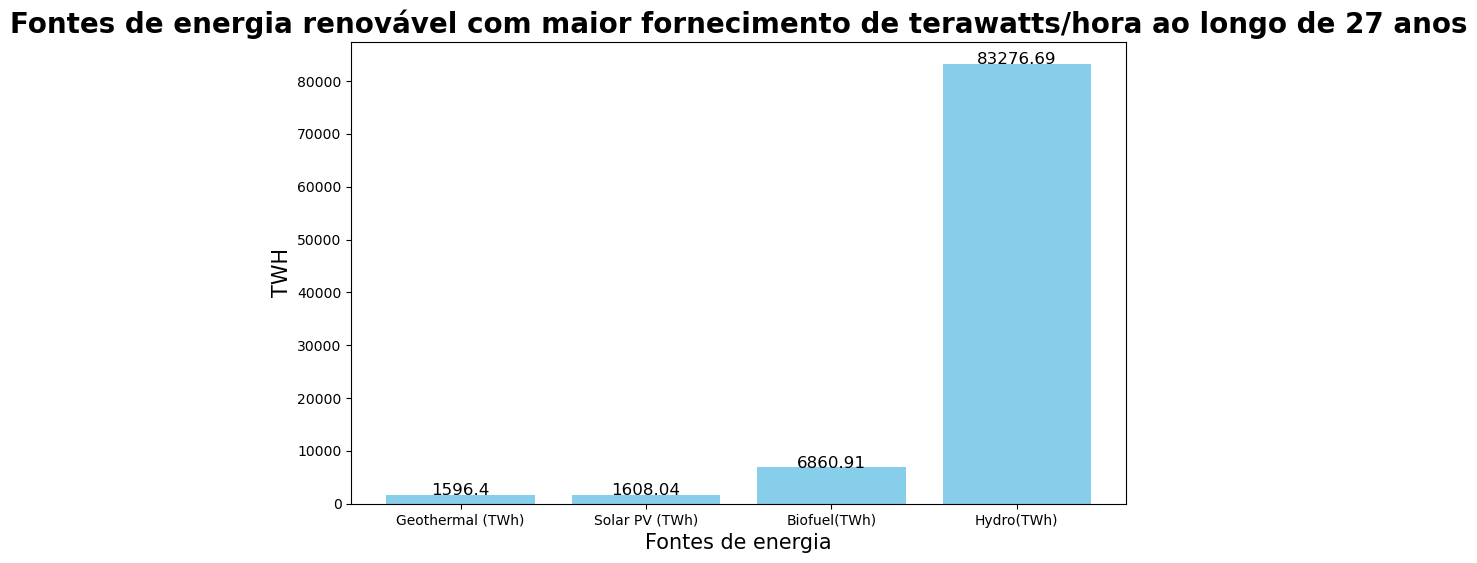

In [6]:
# Vamos plotar um gráfico para vermos a distribuição de consumo:

plt.figure(figsize=(10,6))
plt.bar(soma.index, soma.values, color='skyblue')
plt.title('Fontes de energia renovável com maior fornecimento de terawatts/hora ao longo de 27 anos', fontsize=20, weight='bold')
plt.xlabel('Fontes de energia', fontsize=15)
plt.ylabel('TWH', fontsize=15)

for i, valor in enumerate(soma.values):
    plt.text(i, valor + 2, str(valor), ha='center', fontsize=12)
plt.show()

# Agora vamos ver como se da a geração de cada fonte de energia. 

* Geração de energia hidroenergia.

In [7]:
df_Hydro = df_ER['Hydro(TWh)']

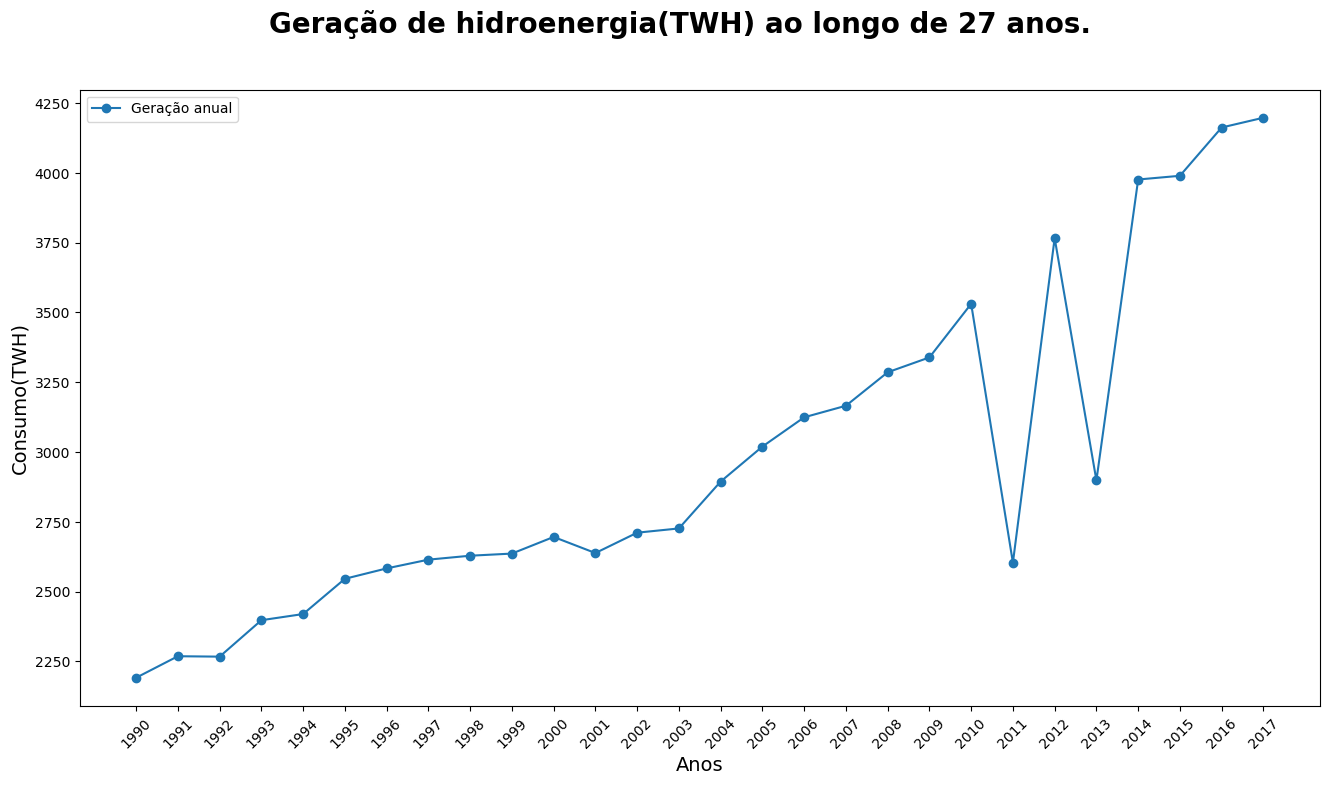

In [8]:
# Criar uma figura e área de plotagem:
fig, ax = plt.subplots(figsize=(16,8)) 

# Adicionando titulo à figura:
plt.suptitle("Geração de hidroenergia(TWH) ao longo de 27 anos.", fontsize=20, weight='bold')

# Plotar a série temporal(Gráfico de linhas):
ax.plot(df_Hydro, label='Geração anual', marker='o')

# Dá titulo aos eixos:
ax.set_xlabel("Anos", fontsize=14)
ax.set_ylabel("Consumo(TWH)", fontsize=14)

# Adicionar todos os anos no eixo X
ax.set_xticks(df_Hydro.index)  # Assumindo que o índice do DataFrame contém os anos
ax.set_xticklabels(df_Hydro.index, rotation=45)  # Gira os anos para melhor visualização

# Adicionando a legenda:
ax.legend()
#Plotando:
plt.show()

* Média móvel da geração de hidroenergia.

In [9]:
Hydro_rolling_6m = df_Hydro.rolling(window=6).mean()
Hydro_rolling_12m = df_Hydro.rolling(window=12).mean()

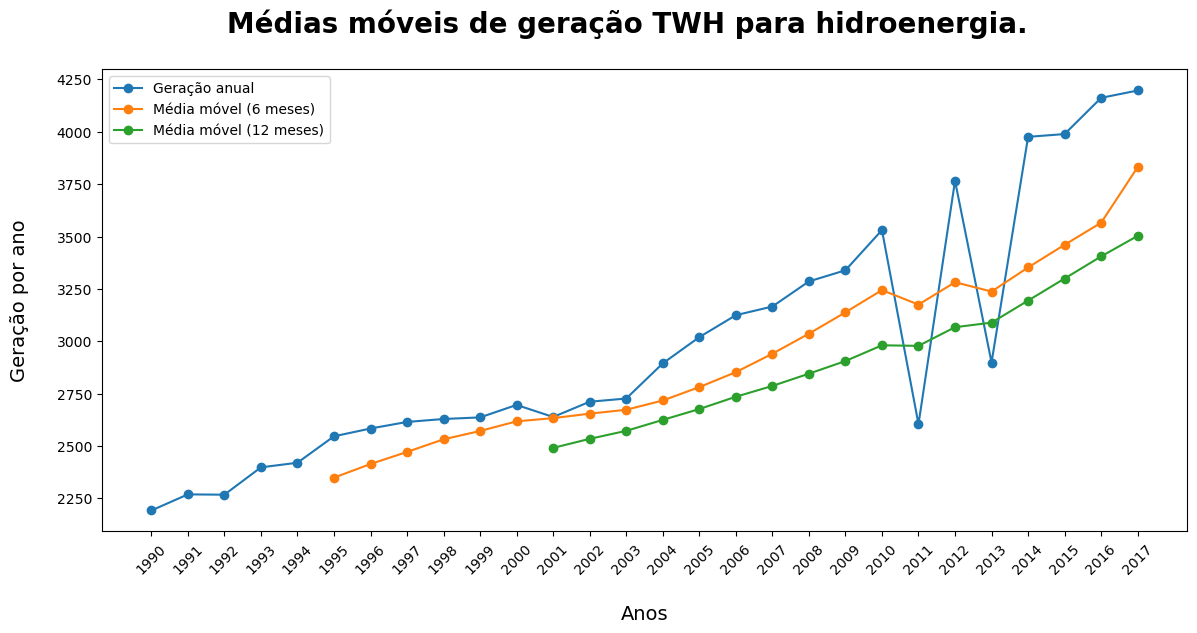

In [10]:
fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle("Médias móveis de geração TWH para hidroenergia.", fontsize=20, weight='semibold')

ax.plot(df_Hydro.index, df_Hydro, label='Geração anual', marker='o')
ax.plot(df_Hydro.index, Hydro_rolling_6m, label='Média móvel (6 meses)', marker='o')
ax.plot(df_Hydro.index, Hydro_rolling_12m, label='Média móvel (12 meses)', marker='o')

# Adicionar todos os anos no eixo X
ax.set_xticks(df_Hydro.index)  # Assumindo que o índice do DataFrame contém os anos
ax.set_xticklabels(df_Hydro.index, rotation=45)  # Gira os anos para melhor visualização

ax.set_xlabel('Anos', fontsize=14, labelpad=20)
ax.set_ylabel('Geração por ano', fontsize=14, labelpad=20)

ax.legend()
plt.show()

# Geração média anual de TeraWatts/Hora de biocombustível.

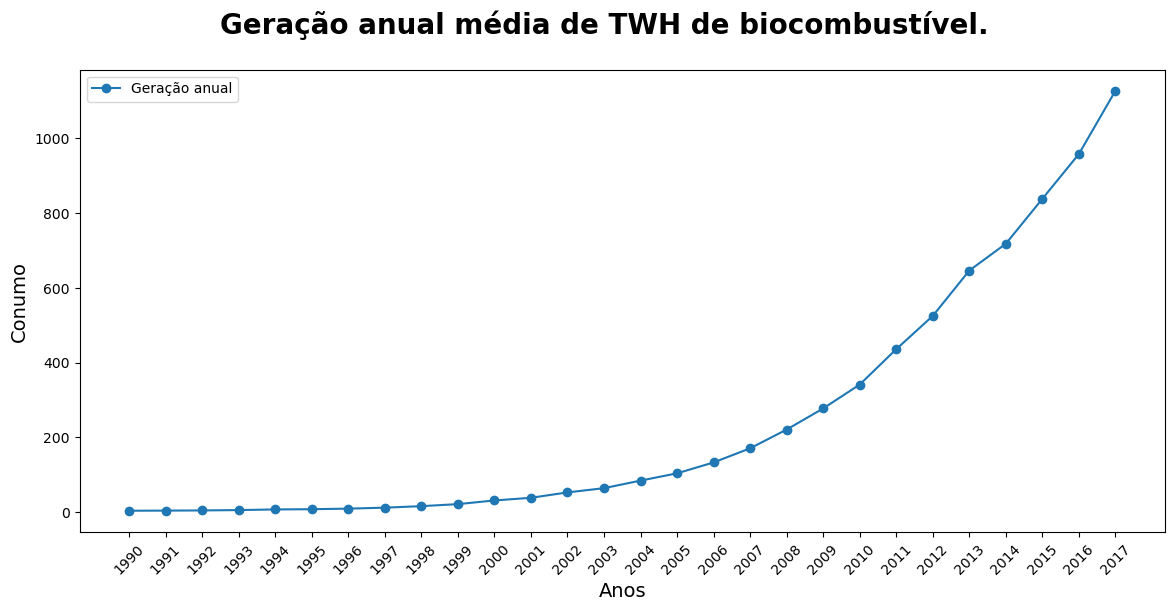

In [11]:
# Extraindo somente os as informações de biocombustível:
df_bio = df_ER['Biofuel(TWh)']

# Plotando o grafico:
fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração anual média de TWH de biocombustível.', fontsize=20, weight='bold')

ax.plot(df_bio, label='Geração anual', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_bio.index)
ax.set_xticklabels(df_bio.index, rotation=45)

ax.legend()
plt.show()

* Vamos ver a média móvel para a geração de biocombustíveis.

In [12]:
Bio_rolling_6m = df_bio.rolling(window=6).mean()
Bio_rolling_12m = df_bio.rolling(window=12).mean()

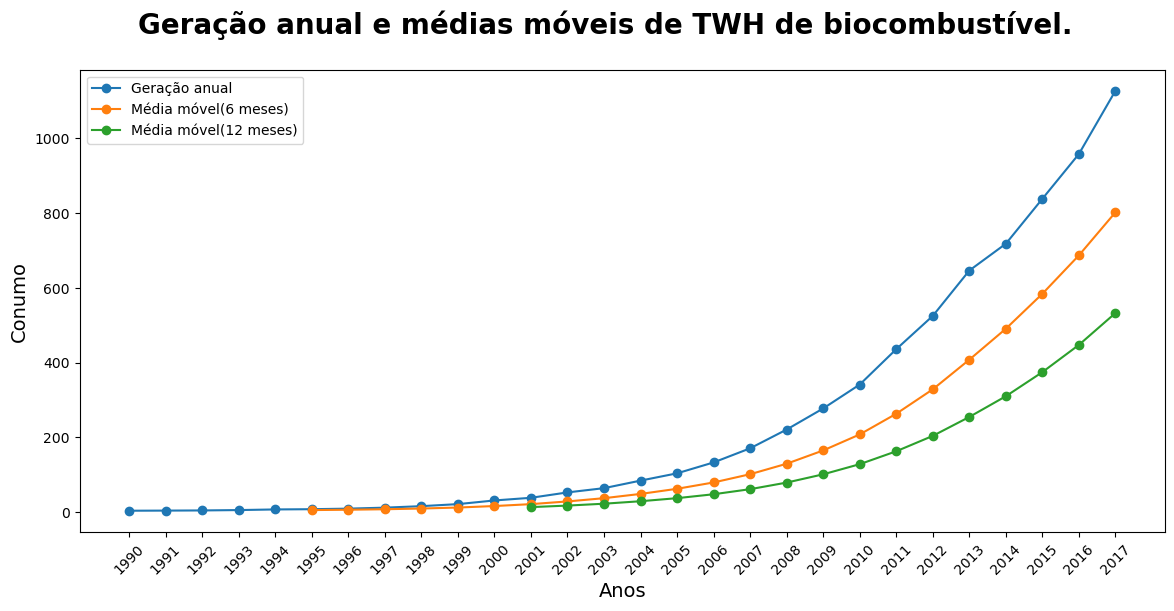

In [13]:
fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração anual e médias móveis de TWH de biocombustível.', fontsize=20, weight='bold')

ax.plot(df_bio, label='Geração anual', marker='o')
ax.plot(df_bio.index, Bio_rolling_6m, label='Média móvel(6 meses)', marker='o')
ax.plot(df_bio.index, Bio_rolling_12m, label='Média móvel(12 meses)', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_bio.index)
ax.set_xticklabels(df_bio.index, rotation=45)

ax.legend()
plt.show()

# Geração média anual de TeraWatts/Hora de energia solar.

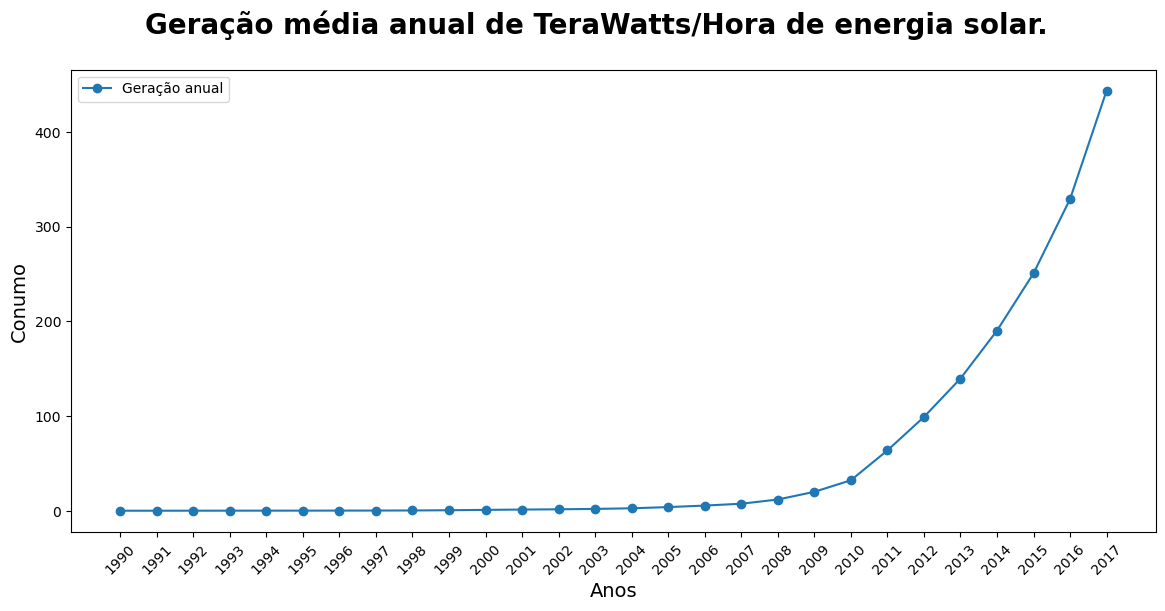

In [14]:
df_Solar = df_ER['Solar PV (TWh)']

fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração média anual de TeraWatts/Hora de energia solar.', fontsize=20, weight='bold')

ax.plot(df_Solar, label='Geração anual', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_Solar.index)
ax.set_xticklabels(df_Solar.index, rotation=45)

ax.legend()
plt.show()

* Vamos ver a média móvel para a geração de energia solar.

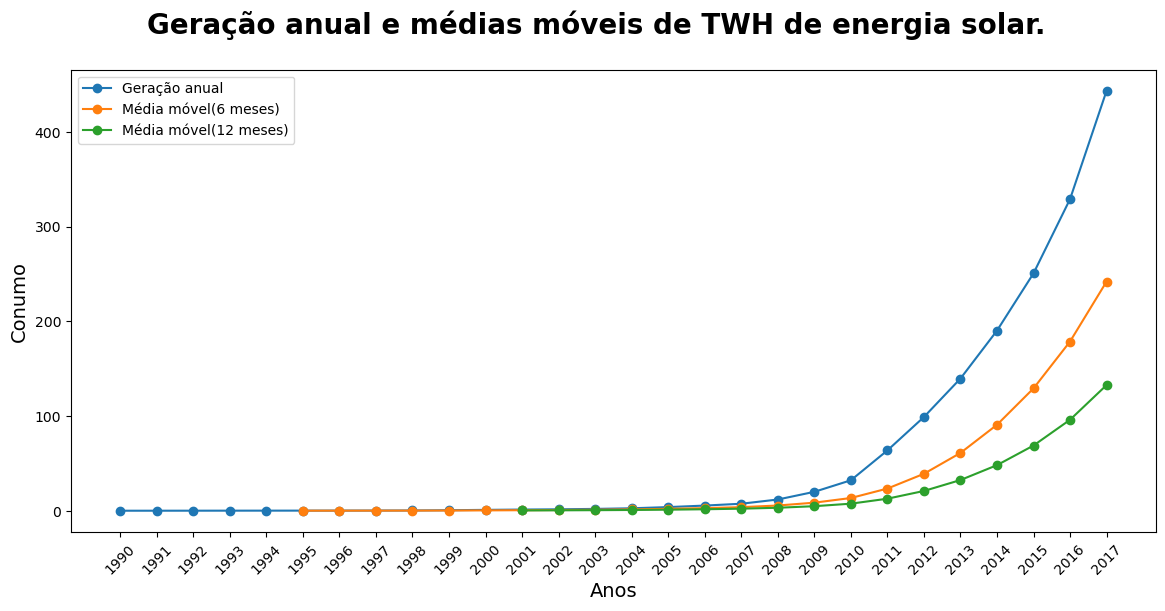

In [15]:
Solar_rolling_6m = df_Solar.rolling(window=6).mean()
Solar_rolling_12m = df_Solar.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração anual e médias móveis de TWH de energia solar.', fontsize=20, weight='bold')

ax.plot(df_Solar, label='Geração anual', marker='o')
ax.plot(df_Solar.index, Solar_rolling_6m, label='Média móvel(6 meses)', marker='o')
ax.plot(df_Solar.index, Solar_rolling_12m, label='Média móvel(12 meses)', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_Solar.index)
ax.set_xticklabels(df_Solar.index, rotation=45)

ax.legend()
plt.show()

# Geração média anual de TeraWatts/Hora de energia geotérmica.

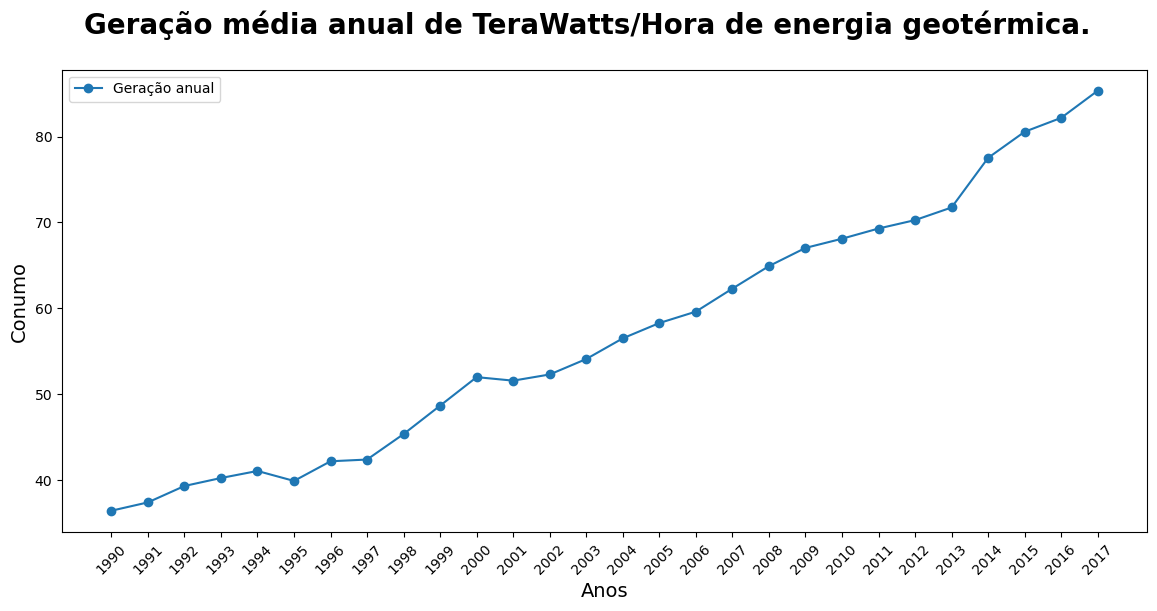

In [16]:
df_Geo = df_ER['Geothermal (TWh)']

fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração média anual de TeraWatts/Hora de energia geotérmica.', fontsize=20, weight='bold')

ax.plot(df_Geo, label='Geração anual', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_Geo.index)
ax.set_xticklabels(df_Geo.index, rotation=45)

ax.legend()
plt.show()

* Média móvel.

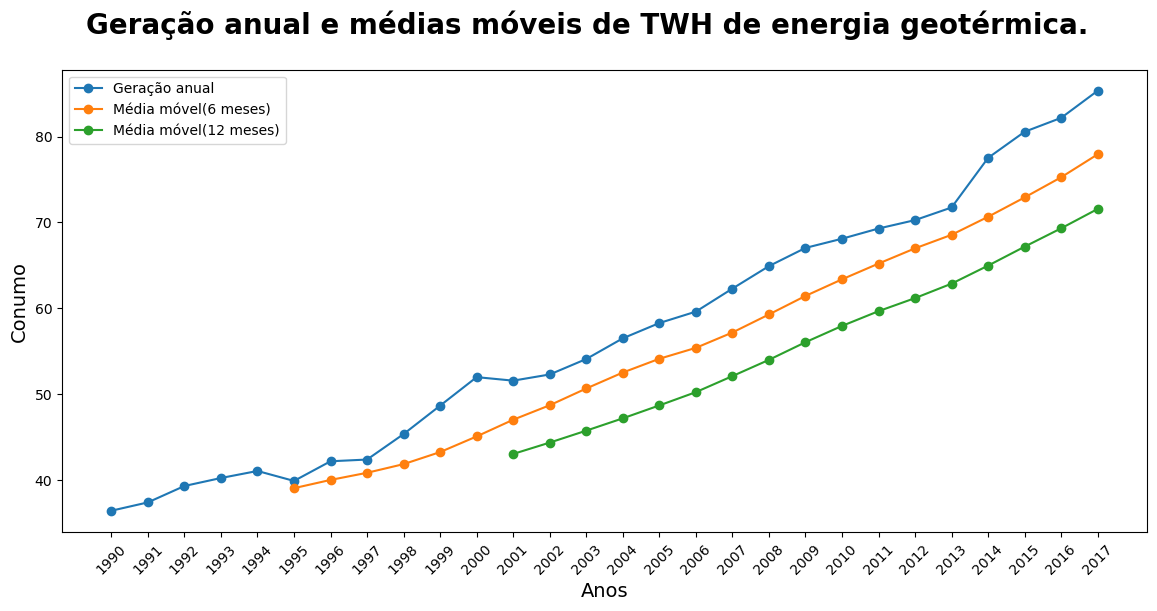

In [17]:
Geo_rolling_6m = df_Geo.rolling(window=6).mean()
Geo_rolling_12m = df_Geo.rolling(window=12).mean()

fig, ax = plt.subplots(figsize=(14,6))

plt.suptitle('Geração anual e médias móveis de TWH de energia geotérmica.', fontsize=20, weight='bold')

ax.plot(df_Geo, label='Geração anual', marker='o')
ax.plot(df_Geo.index, Geo_rolling_6m, label='Média móvel(6 meses)', marker='o')
ax.plot(df_Geo.index, Geo_rolling_12m, label='Média móvel(12 meses)', marker='o')

ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Conumo', fontsize=14)

ax.set_xticks(df_Geo.index)
ax.set_xticklabels(df_Geo.index, rotation=45)

ax.legend()
plt.show()

# teste Anova para compara a média de geração de hidroenergia e diferentes fontes de energia.

In [18]:
# Hidro X Solar:  
t_stat,p_valor = scipy.stats.ttest_ind(df_ER['Solar PV (TWh)'], df_ER['Hydro(TWh)'])
print(f'Teste t: {t_stat}, p-valor: {p_valor}')

Teste t: -25.44250414246895, p-valor: 9.668587911772276e-32


In [19]:
# Hidro X Biocombustível:
t_stat, p_valor = scipy.stats.ttest_ind(df_ER['Hydro(TWh)'], df_ER['Biofuel(TWh)'])
print(f'Teste t: {t_stat}, p-valor: {p_valor}')

Teste t: 21.210439333890143, p-valor: 7.398730028885081e-28


In [20]:
# Hidro X Geotermica:
t_stat,p_valor = scipy.stats.ttest_ind(df_ER['Hydro(TWh)'], df_ER['Geothermal (TWh)'])
print(f'Teste t: {t_stat}, p-valor: {p_valor}')

Teste t: 25.89424398728896, p-valor: 4.011738408878833e-32


# Distribuição da geração de fontes de energia pelos anos de 1990-2017.

* Distribuicão de hidroenergia:

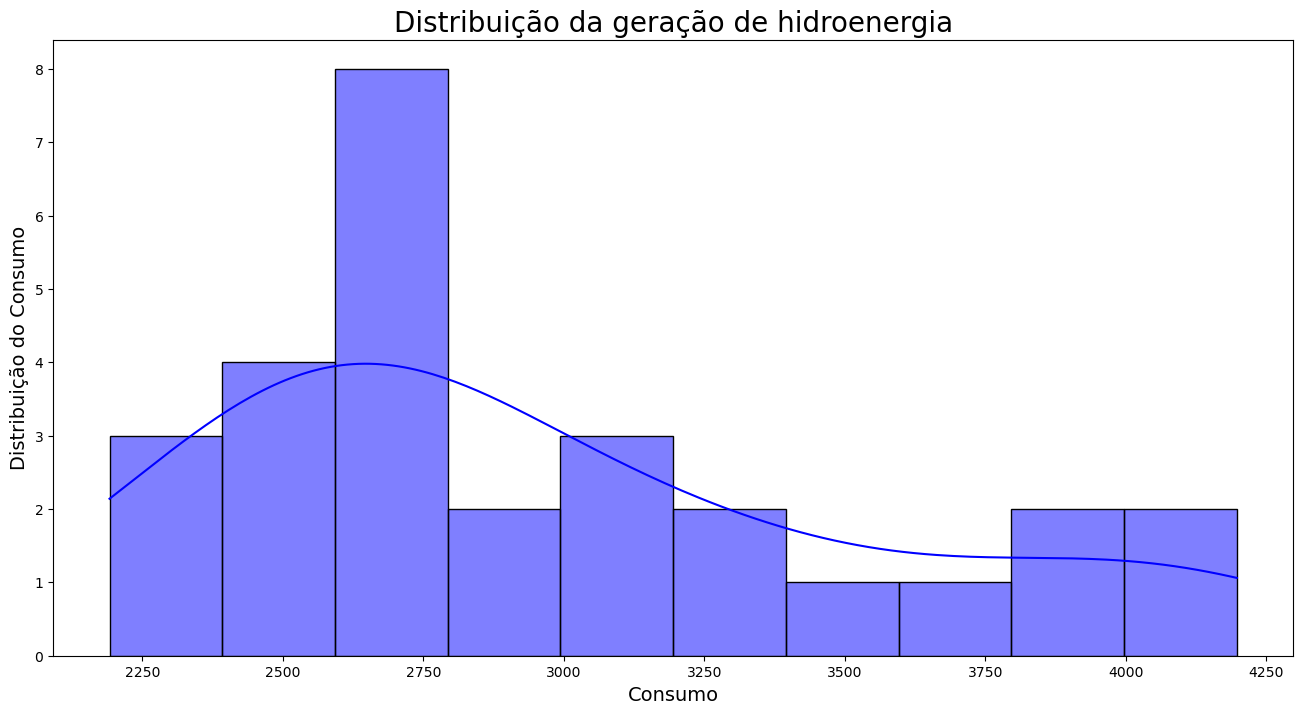

In [21]:
# Plotando o gráfico de distrbuição:
plt.figure(figsize=(16,8))
sns.histplot(df_Hydro, bins=10, kde=True, color='blue')

# Rotulos:
plt.title('Distribuição da geração de hidroenergia', fontsize=20)
plt.xlabel('Consumo', fontsize=14)
plt.ylabel('Distribuição do Consumo', fontsize=14)

# Plotar gráfico:
plt.show()

* Distrbuição da energia solar.

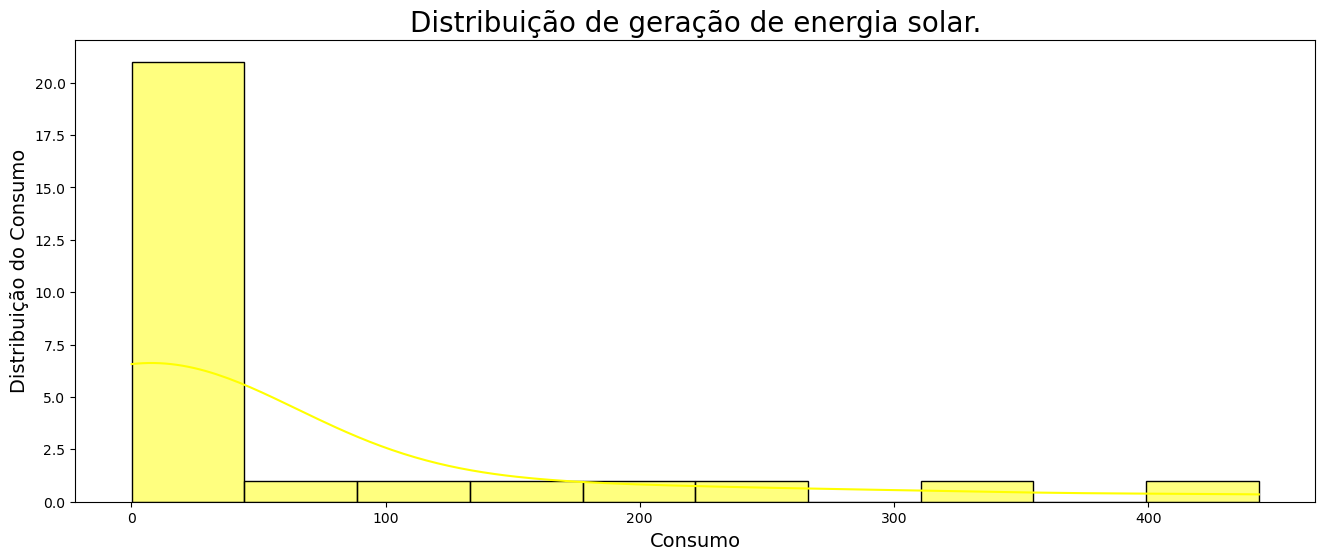

In [22]:
plt.figure(figsize=(16,6))
sns.histplot(df_Solar, bins=10, kde=True, color='yellow')

plt.title('Distribuição de geração de energia solar.', fontsize=20)
plt.xlabel('Consumo', fontsize=14)
plt.ylabel('Distribuição do Consumo', fontsize=14)

plt.show()

* Distribuição de biocombustível:

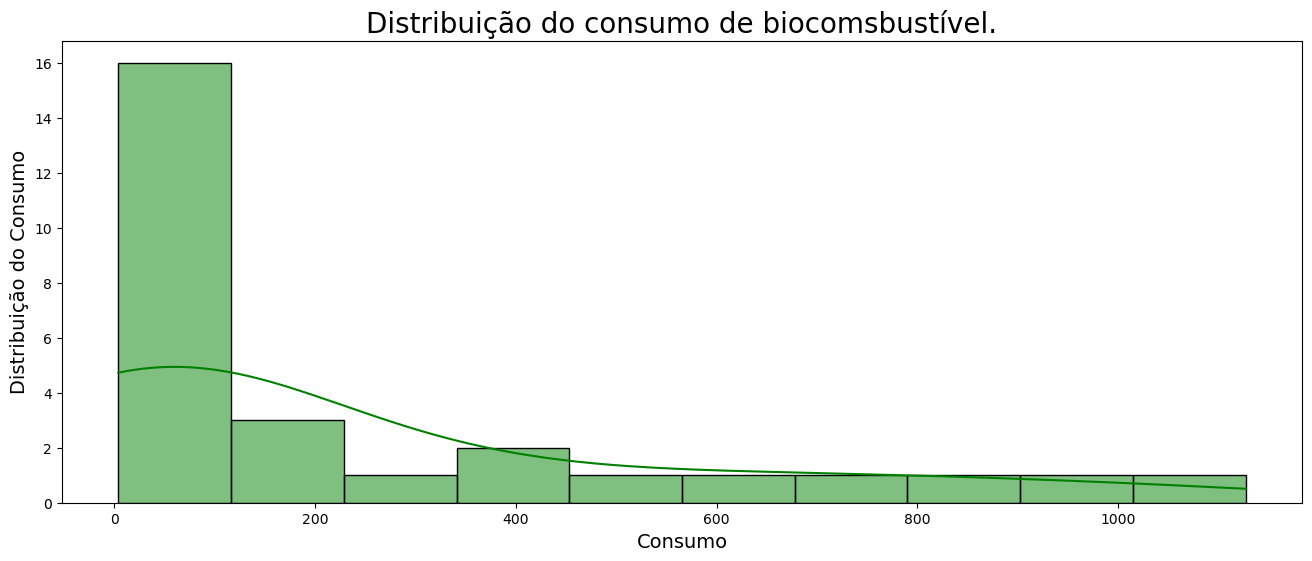

In [23]:
plt.figure(figsize=(16,6))
sns.histplot(df_bio, bins=10, kde=True, color='green')

plt.title('Distribuição do consumo de biocomsbustível.', fontsize=20)
plt.xlabel('Consumo', fontsize=14)
plt.ylabel('Distribuição do Consumo', fontsize=14)

plt.show()

* Distribuição de energia Geotérmica:

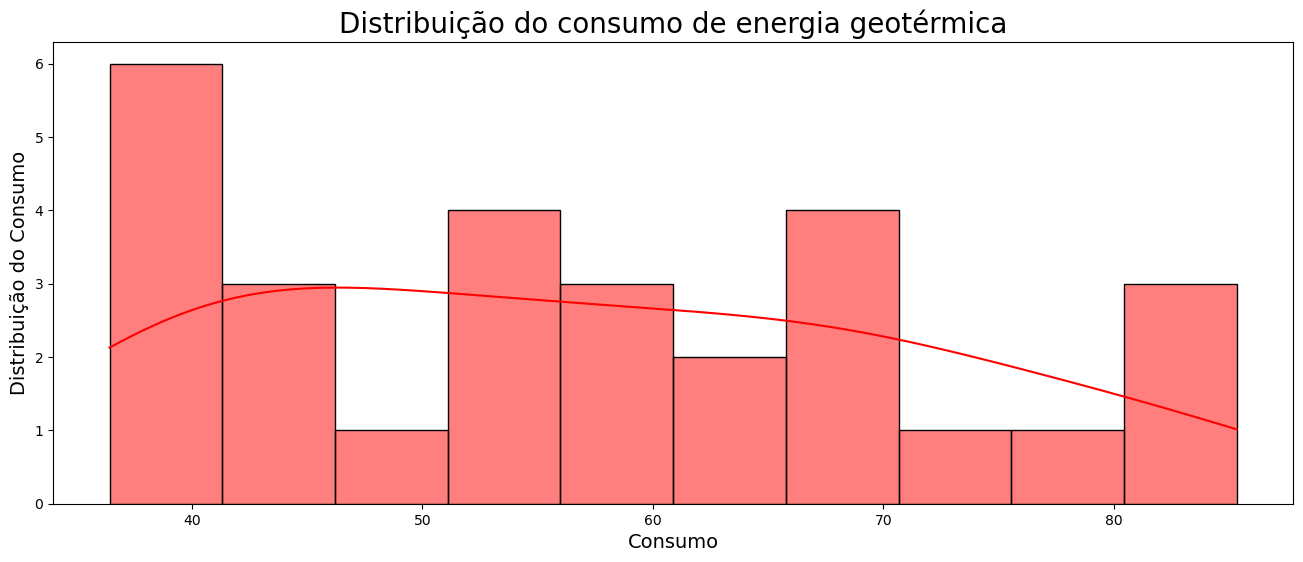

In [24]:
plt.figure(figsize=(16,6))
sns.histplot(df_Geo, bins=10, kde=True, color='red')

plt.title('Distribuição do consumo de energia geotérmica', fontsize=20)
plt.xlabel('Consumo', fontsize=14)
plt.ylabel('Distribuição do Consumo', fontsize=14)

plt.show()

# Correlação entre as fontes.

In [25]:
# Vamos ultilizar a função corr() para calcular a nossa matriz de correlação:
Matriz_Correlacao = df_ER.corr()
Matriz_Correlacao

,Hydro(TWh),Biofuel(TWh),Solar PV (TWh),Geothermal (TWh)
Hydro(TWh),1.000000,0.870333,0.795868,0.916762
Biofuel(TWh),0.870333,1.000000,0.953079,0.908150
Solar PV (TWh),0.795868,0.953079,1.000000,0.780185
Geothermal (TWh),0.916762,0.908150,0.780185,1.000000


* Vamos visualizar as nossas correlações através de heatmap:

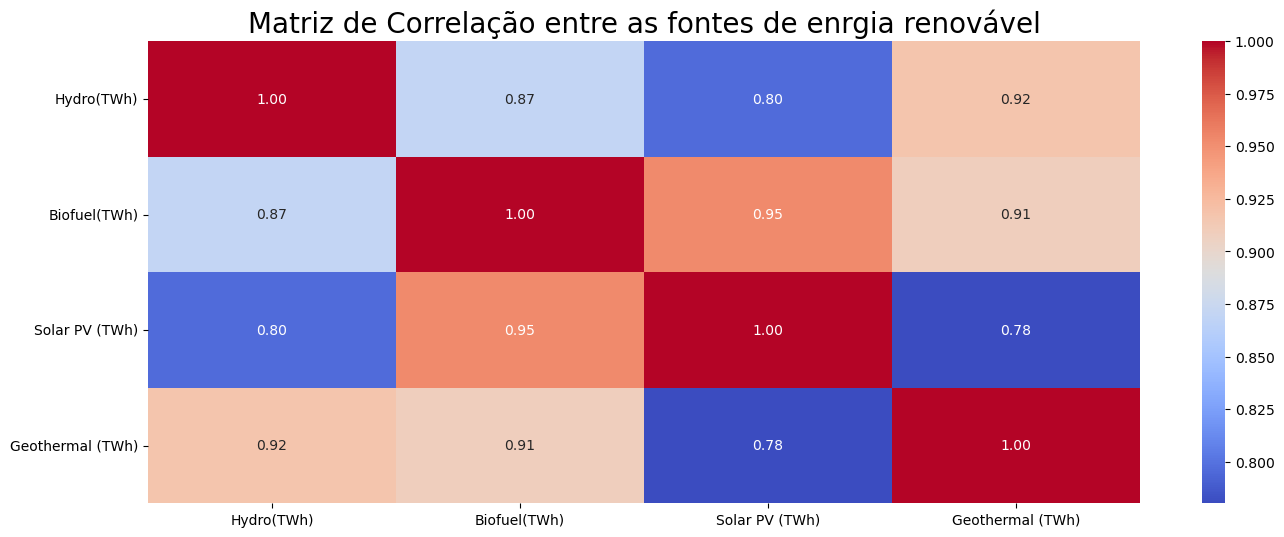

In [26]:
plt.figure(figsize=(16,6))
sns.heatmap(Matriz_Correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre as fontes de enrgia renovável', fontsize=20)
plt.show()

# Comparação por décadas.

* Vamos resetar o index para podermos extrair a coluna de anos; depois vamos criar uma nova coluna que ira receber os anos e por fim iremos dividir cada ano por década. 

In [33]:
# Resertando o index:
df_ER = df_ER.reset_index()

# Convertendo a coluna de anos para datetime:
df_ER['Year'] = pd.to_datetime(df_ER['Year'], format='%Y').dt.year

bins = [1990, 2000, 2010, 2020, float('inf')]  # Bins ajustados
labels = ['Anos 90', 'Anos 2000', 'Anos 2010', 'Anos 2020+']  # Número de labels corresponde aos bins
df_ER['Década'] = pd.cut(df_ER['Year'], bins=bins, labels=labels)

display(df_ER[['Década', 'Year']])

,Década,Year
0,NaN,1990
1,Anos 90,1991
2,Anos 90,1992
3,Anos 90,1993
4,Anos 90,1994
5,Anos 90,1995
6,Anos 90,1996
7,Anos 90,1997
8,Anos 90,1998
9,Anos 90,1999


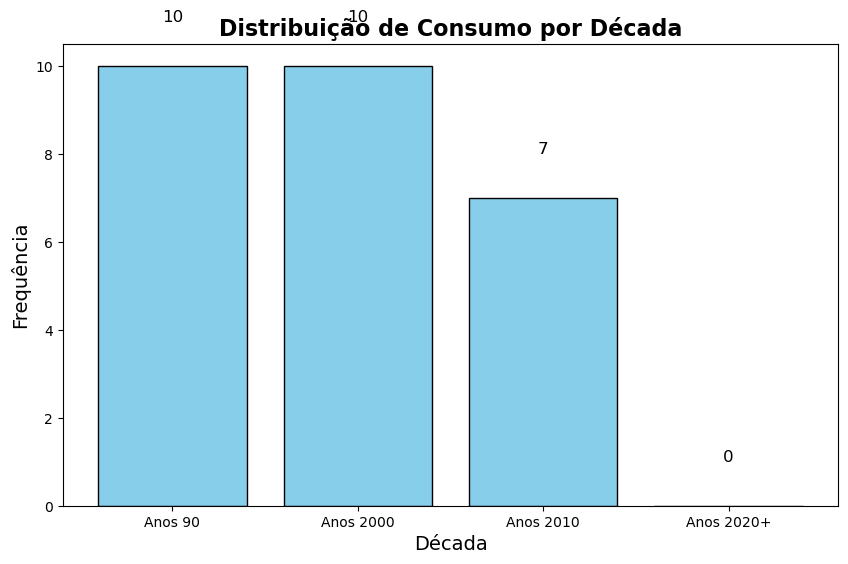

In [35]:
# Contar a frequência de cada década
decade_counts = df_ER['Década'].value_counts().sort_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(decade_counts.index, decade_counts.values, color='skyblue', edgecolor='black')

# Título e rótulos
plt.title('Distribuição de Consumo por Década', fontsize=16, weight='bold')
plt.xlabel('Década', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adicionar rótulos acima das barras
for i, value in enumerate(decade_counts.values):
    plt.text(i, value + 1, str(value), ha='center', fontsize=12)

# Exibir o gráfico
plt.show()
